# Explore here

In [59]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import *


In [39]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")


In [40]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [41]:
# como dice el enunciado, nos vamos a quedar solamente con las 3 columnas referentes a la ubicacion. 

df_place = df[["MedInc", "Latitude","Longitude"]]
df_place

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25
...,...,...,...
20635,1.5603,39.48,-121.09
20636,2.5568,39.49,-121.21
20637,1.7000,39.43,-121.22
20638,1.8672,39.43,-121.32


In [42]:
# vamos a ver si hay valores faltantes

df_place.isna().any().sum()

np.int64(0)

Parece que no hay valores nulos.

In [43]:
# Podemos pasar ahora a separar entre test y train

X_train, X_test = train_test_split(df_place, test_size=0.2, random_state=42)
print(X_train.shape,"\n", X_test.shape)

(16512, 3) 
 (4128, 3)


## Creación del modelo Kmeans

In [44]:
model_KM = KMeans(n_clusters = 6, random_state = 42)
model_KM.fit(X_train)

KMeans(n_clusters=6, random_state=42)

In [45]:
# Sacamos ahora un array con las agruapciones, en este caso 6, de cada una de las filas del conjunto train.

predictions_train = model_KM.predict(X_train)


In [46]:
# Sacamos ahora un array con las agruapciones, en este caso 6, de cada una de las filas del conjunto test

predictions_test = model_KM.predict(X_test)

In [47]:
# Sacamos ahora un array con las agruapciones, en este caso 6, de cada una de las filas del conjunto total
predictions_all = model_KM.predict(df_place)

In [ ]:
## insertamos el resultado al propio datafame X en los tres casos. 

X_train["cluster"] = predictions_train
X_test["cluster"] = predictions_test
df_place["cluster"] = predictions_all
X_train

/tmp/ipykernel_505/270145112.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_place["cluster"] = predictions_all


,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5
...,...,...,...,...
11284,6.3700,33.78,-117.96,2
11964,3.0500,34.02,-117.43,3
5390,2.9344,34.03,-118.38,3
860,5.7192,37.58,-121.96,0


## Exposición Gráfica de los resutlados

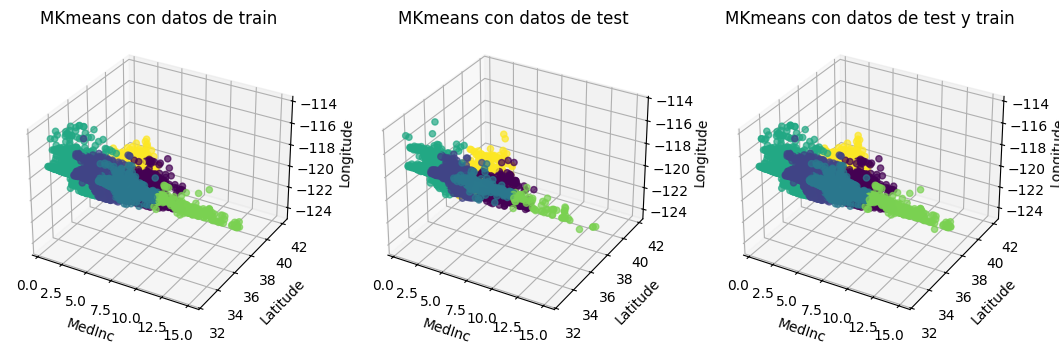

In [ ]:
# primneramente vamos a expresar en 4d los resultados. La cuarta dimensión es el color de los puntos que muestra a qué cluster pertence.

fig, ax = plt.subplots(1, 3, figsize=(13, 11), subplot_kw={'projection': '3d'})

ax[0].scatter(X_train["MedInc"], X_train["Latitude"], X_train["Longitude"], c = X_train["cluster"], alpha=0.7)
ax[1].scatter(X_test["MedInc"], X_test["Latitude"], X_test["Longitude"], c = X_test["cluster"], alpha=0.7)
ax[2].scatter(df_place["MedInc"], df_place["Latitude"], df_place["Longitude"], c = df_place["cluster"], alpha=0.7)
ax[0].set_xlabel("MedInc")
ax[1].set_xlabel("MedInc")
ax[2].set_xlabel("MedInc")
ax[0].set_ylabel("Latitude")
ax[1].set_ylabel("Latitude")
ax[2].set_ylabel("Latitude")
ax[0].set_zlabel("Longitude")
ax[1].set_zlabel("Longitude")
ax[2].set_zlabel("Longitude")

ax[0].set_title("MKmeans con datos de train")
ax[1].set_title("MKmeans con datos de test")
ax[2].set_title("MKmeans con datos de test y train")

plt.show()


Aquí se muestra las dos nubes de puntos. He querido reflejar el cluster con el color. Si bien hay que hacer un poco de esfuerzo para verlo bien se intuye que la clasificación ha sido bastante buena. 

Text(0.5, 1.0, 'Proyección YZ (Total)')

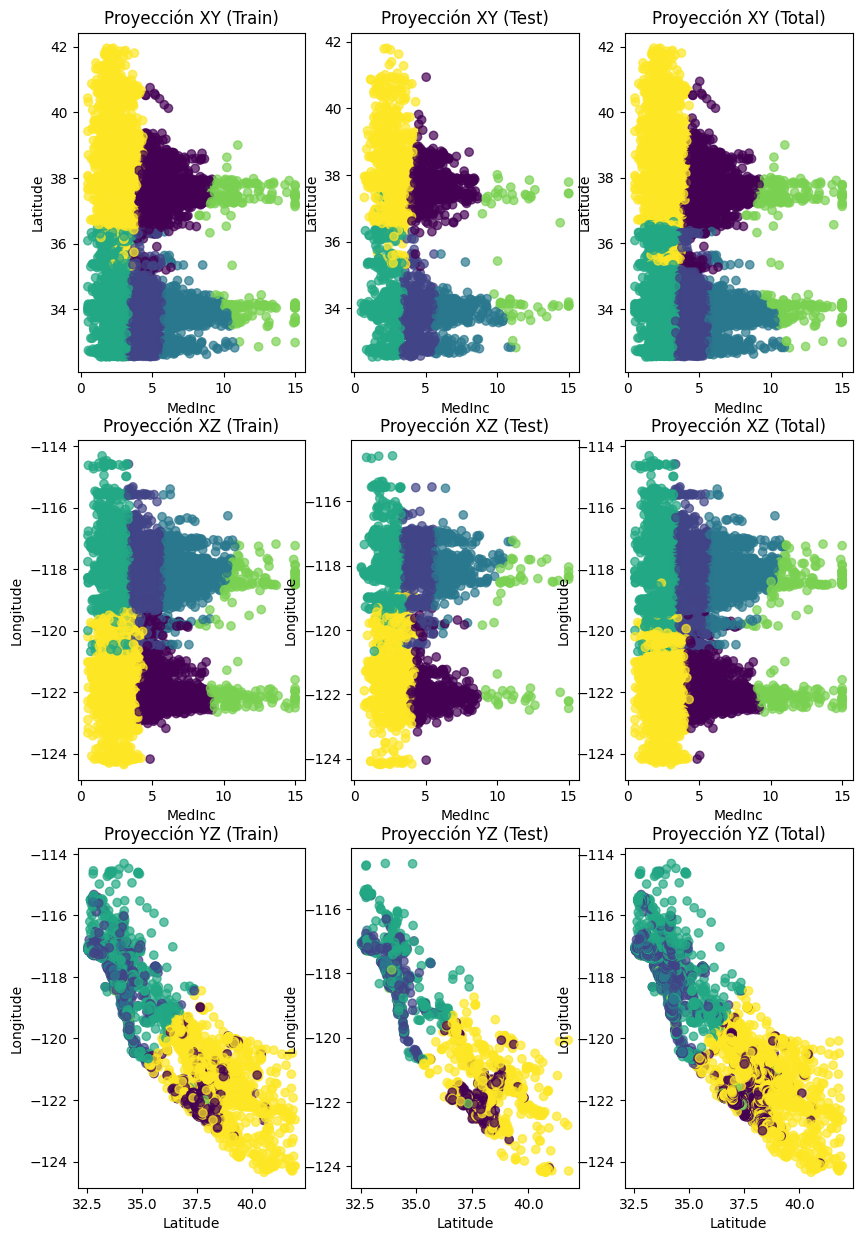

In [ ]:
# Voy a graficar ahora por proyecciones de planos para entender mejor los resultados. El 3d nos da una gran idea pero estamos intentando ver 3 dimensiones en una pantalla de 2,
# por lo que se pierde bastante información.  

fig, ax = plt.subplots(3,3,figsize = (10,15))



# Graficar proyecciones 2D en el resto de subgráficos (XY, XZ, YZ)
ax[0,0].scatter(X_train["MedInc"], X_train["Latitude"], c=X_train["cluster"], alpha=0.7)
ax[0,0].set_xlabel("MedInc")
ax[0,0].set_ylabel("Latitude")
ax[0,0].set_title("Proyección XY (Train)")

ax[1,0].scatter(X_train["MedInc"], X_train["Longitude"], c=X_train["cluster"], alpha=0.7)
ax[1,0].set_xlabel("MedInc")
ax[1,0].set_ylabel("Longitude")
ax[1,0].set_title("Proyección XZ (Train)")

ax[2,0].scatter(X_train["Latitude"], X_train["Longitude"], c=X_train["cluster"], alpha=0.7)
ax[2,0].set_xlabel("Latitude")
ax[2,0].set_ylabel("Longitude")
ax[2,0].set_title("Proyección YZ (Train)")

ax[0,1].scatter(X_test["MedInc"], X_test["Latitude"], c=X_test["cluster"], alpha=0.7)
ax[0,1].set_xlabel("MedInc")
ax[0,1].set_ylabel("Latitude")
ax[0,1].set_title("Proyección XY (Test)")

ax[1,1].scatter(X_test["MedInc"], X_test["Longitude"], c=X_test["cluster"], alpha=0.7)
ax[1,1].set_xlabel("MedInc")
ax[1,1].set_ylabel("Longitude")
ax[1,1].set_title("Proyección XZ (Test)")

ax[2,1].scatter(X_test["Latitude"], X_test["Longitude"], c=X_test["cluster"], alpha=0.7)
ax[2,1].set_xlabel("Latitude")
ax[2,1].set_ylabel("Longitude")
ax[2,1].set_title("Proyección YZ (Test)")

ax[0,2].scatter(df_place["MedInc"], df_place["Latitude"], c=df_place["cluster"], alpha=0.7)
ax[0,2].set_xlabel("MedInc")
ax[0,2].set_ylabel("Latitude")
ax[0,2].set_title("Proyección XY (Total)")

ax[1,2].scatter(df_place["MedInc"], df_place["Longitude"], c=df_place["cluster"], alpha=0.7)
ax[1,2].set_xlabel("MedInc")
ax[1,2].set_ylabel("Longitude")
ax[1,2].set_title("Proyección XZ (Total)")

ax[2,2].scatter(df_place["Latitude"], df_place["Longitude"], c=df_place["cluster"], alpha=0.7)
ax[2,2].set_xlabel("Latitude")
ax[2,2].set_ylabel("Longitude")
ax[2,2].set_title("Proyección YZ (Total)")

Reforzamos lo expuesto anteriormente. Parece que el algoritmo ha agrupado muy bien en los diferentes clusters. El plano que ha quedado más dsperso ha sido el Longitud-Latitud. Creo que se debe a que las relaciones entre los otros planos ha sido interpretada por el algoritmo como más importante. Podríamos indagar más y ver por qué lo ha interpretado así, pero voy a parar aquí. 

## Algoritmo supervisado con el dataset completo (predicción de "cluster")

In [51]:
# Voy a hacer ahora que los X_ no contengan cluster (realmente lo incluí solamente para el graficado). El cluster será precisamente la y. 

y_train = X_train["cluster"]
X_train = X_train.drop("cluster" , axis = 1)

y_test = X_test["cluster"]
X_test = X_test.drop("cluster" , axis = 1)


In [58]:
# Aplico RandomForest porque creo que es una buena opción en este caso y no precisa de escalado. 

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)



In [65]:
# sacamos algunas métricas

train_accuracy = accuracy_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train, average = "macro")
test_accuracy = accuracy_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test, average = "macro")

print (train_accuracy , train_f1)
print(test_accuracy, test_f1)

1.0 1.0
0.9963662790697675 0.9942627463791402


Podemos ver que la previsión del algoritmo es francamente buena. 

Me he entretenido bastante en la parte del graficado pero quería poder mostrar bien gráficamente el conjunto. Creo que para poder mostrar algo las gráficas son clave. 